## Beta-Binomial Distribution to Model Green Pea Galaxy Companion Probability

[Green Peas](https://en.wikipedia.org/wiki/Pea_galaxy) are small galaxies (1 to 10\% the mass of the Milky Way), but are forming stars at a much faster rate compared to our own galaxy. It is not clear why Green Peas are forming stars at such a fast pace. One possibility is that the formation of new stars is triggered by interactions with nearby companions.

To test this hypotesis, Laufman et al. (2022) used new and archival data to search for companions around a sample of 23 Green Pea galaxies, and around a sample of 43 normal galaxies, matched in stellar mass and distance to the sample of Green Peas (but with normal star-formation rates). The data were obtained with the [MUSE spectrograph](https://www.eso.org/sci/facilities/develop/instruments/muse.html) on the [Very large Telescope](https://www.eso.org/sci/facilities/paranal.html) in Chile. 

The results of the analysis are collected in the file Laufman_Table2.dat, which includes the following columns:

- Galaxy         : object identifier	
- has_companion  : a flag that identify whether or not the galaxy has a companion  (1= has a companion, 0 =does not have a companion)
- GP             : Is it a Green Pea or a Normal Galaxy ? 1=GP  2= Normal Galaxy

I will use this data to estimate the probability that a galaxy has a companion using Bayesian Inference. I will make this estimate for both samples, the Green Peas and the normal galaxies.




In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import random
from astropy.io import ascii
from scipy.stats import beta

In [7]:
cd /Users/abbystokes/Desktop

/Users/abbystokes/Desktop


### 1. Importing data and Visual Inspection

In [8]:
#Looking at head of data
df = pd.read_table("Laufman_Table2.dat", delimiter=" ",skipinitialspace=True)
df = pd.DataFrame(df)
print(df.head())
print(df.describe())

                     #Galaxy\thas_companion  GPorNOT
J094458.22-004545.4                       1        0
J130211.15-000516.4                       0        0
J232539.23+004507.2                       0        0
J032244.89+004442.3                       0        0
J012910.15+145934.6                       0        0
       #Galaxy\thas_companion    GPorNOT
count               66.000000  66.000000
mean                 0.060606   1.303030
std                  0.240435   0.960284
min                  0.000000   0.000000
25%                  0.000000   0.000000
50%                  0.000000   2.000000
75%                  0.000000   2.000000
max                  1.000000   2.000000


In [9]:
## Some quick data cleaning

#rename columns
df.columns=["has_companion","GPorNOT"]

#Split data by galaxy type
gp = df[df['GPorNOT']==0]
not_gp = df[df['GPorNOT']==2]

### Histogram for all Data
Now, we want to look at how many of each subset of galaxies contains a companion. For this, we will plot a histogram of each breakdown (all galaxies, green pea galaxies, Non green pea galaxies)

array([[<Axes: title={'center': 'has_companion'}>]], dtype=object)

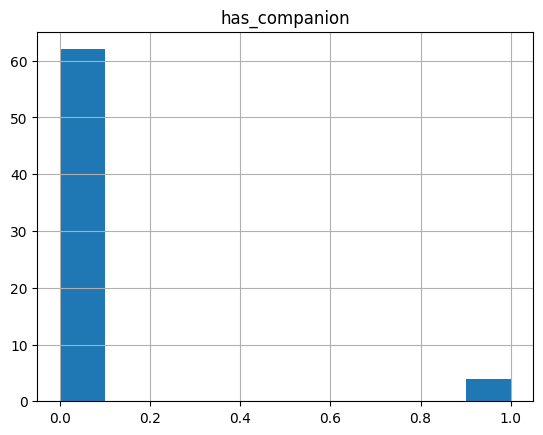

In [10]:
## All Galaxies
df.hist('has_companion')

It looks like there are 4 total observations that were observed to have a companion galaxy. Next, lets see how these 4 are distributed across galaxy type.

       has_companion  GPorNOT
count           43.0     43.0
mean             0.0      2.0
std              0.0      0.0
min              0.0      2.0
25%              0.0      2.0
50%              0.0      2.0
75%              0.0      2.0
max              0.0      2.0


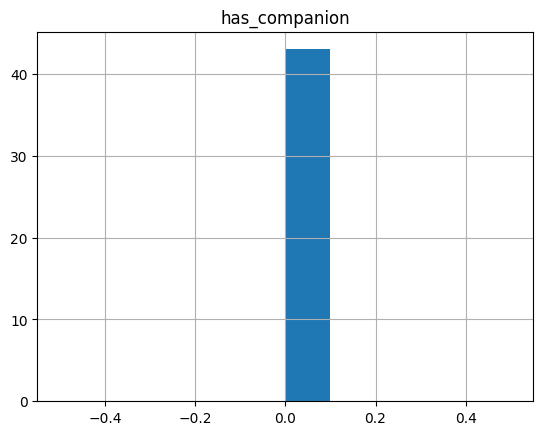

In [11]:
#Non-Green Pea
not_gp.hist('has_companion')
print(not_gp.describe())

It looks like all four observations of companions are for the green pea galaxies

       has_companion  GPorNOT
count      23.000000     23.0
mean        0.173913      0.0
std         0.387553      0.0
min         0.000000      0.0
25%         0.000000      0.0
50%         0.000000      0.0
75%         0.000000      0.0
max         1.000000      0.0


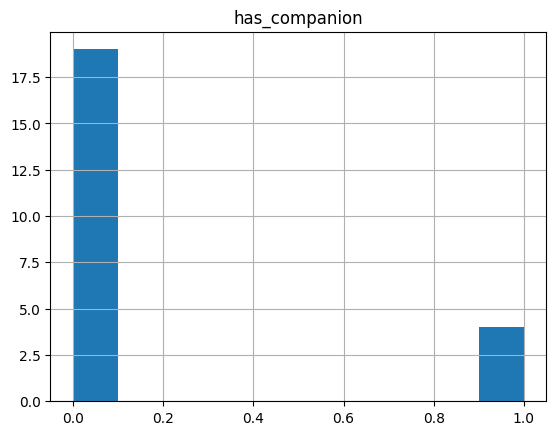

In [12]:
#Green Pea
gp.hist('has_companion')
print(gp.describe())

### 2. Model Selection and Parameter Assumptions
Since a single observation of a given galaxy having a companion can be modeled as a Bernoulli trial with probability of companionship p, we can model the dataset using a Binomial distribution. This, of course, assumes that each observation is i.i.d.

The unknown parameter of interest, p, is the probability that a given galaxy has a companion. Specifically, we are curious how this p varies between Green Pea and Normal Galaxies. 

We chose to model this probability by a Beta distribution, which is beneficial because it has the same range as parameter space from 0 to 1, and is a conjugate prior to Binomial. The constants for the prior, hyperparameters (a,b), will be initially selected as (1,1), which is a uniform distribution from 0 to 1.

### 3. and 4. Building and Plotting Model - Green Pea

Establishing Binomial prior and posterior for Green Pea observations, starting with a=1, b=1

In [22]:
#setting parameters and posterior for Green Pea

a = 1
b = 1
nobs = len(gp)
companions = 4
shape_1 = a + companions
shape_2 = nobs + b - companions
post_mean = shape_1 / (shape_1 + shape_2)
post_var = (shape_1 * shape_2)/((shape_1+shape_2)**2*(shape_1+shape_2+1))
post_lb = beta.ppf(.025, shape_1, shape_2)
post_ub = beta.ppf(.975, shape_1, shape_2)
print('Mean for a=1, b=1:',round(post_mean,4))
print('Variance:',post_var)

print('Lower bound:',round(post_lb,4)," and Upper bound:",round(post_ub,4))

Mean for a=1, b=1: 0.2
Variance: 0.006153846153846154
Lower bound: 0.0713  and Upper bound: 0.3738


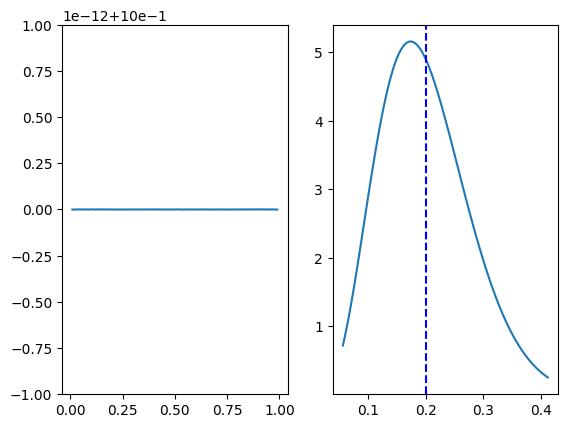

In [21]:
ix,ax = plt.subplots(1,2)
x1 = np.linspace(beta.ppf(0.01, 1, 1), beta.ppf(0.99, 1, 1), 100)
y = beta.pdf(x1,1,1)
ax[0].plot(x1,y)
xp = np.linspace(beta.ppf(0.01, shape_1, shape_2), beta.ppf(0.99, shape_1, shape_2), 100)
y = beta.pdf(xp, shape_1, shape_2)
ax[1].plot(xp,y)
ax[1].axvline(post_mean,color='b',ls='--')


### 3. and 4. Building and Plotting Model - Non Green Pea
Establishing Binomial prior and posterior for Non-Green Pea observations, starting with a=1, b=1

In [23]:
#setting parameters and posterior for Non-Green Pea

a = 1
b = 1
nobs = len(not_gp)
companions = 0 #zero observations with companion
shape_1 = a + companions
shape_2 = nobs + b - companions
post_mean = shape_1 / (shape_1 + shape_2)
post_lb = beta.ppf(.025, shape_1, shape_2)
post_ub = beta.ppf(.975, shape_1, shape_2)
print('Mean for a=1, b=1:',round(post_mean,4))
print('Variance:',post_var)

print('Lower bound:',round(post_lb,4)," and Upper bound:",round(post_ub,4))

Mean for a=1, b=1: 0.0222
Variance: 0.006153846153846154
Lower bound: 0.0006  and Upper bound: 0.0804


Maximum at: 


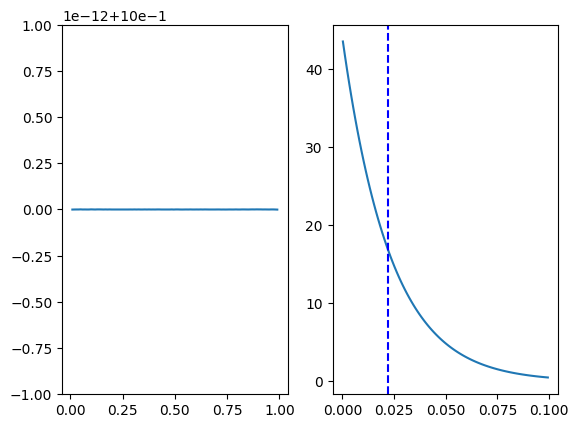

In [16]:
ix,ax = plt.subplots(1,2)
x1 = np.linspace(beta.ppf(0.01, 1, 1), beta.ppf(0.99, 1, 1), 100)
y = beta.pdf(x1,1,1)
ax[0].plot(x1,y)
xp = np.linspace(beta.ppf(0.01, shape_1, shape_2), beta.ppf(0.99, shape_1, shape_2), 100)
y = beta.pdf(xp, shape_1, shape_2)
ax[1].plot(xp,y)
ax[1].axvline(post_mean,color='b',ls='--')
print("Maximum at: ", )

#### 5. Sensitivity Analysis
Now we select different values for a and b to see how they influence our posteriors

Mean for a=10, b=0.2: 0.4217
Lower bound: 0.2618  and Upper bound: 0.5905


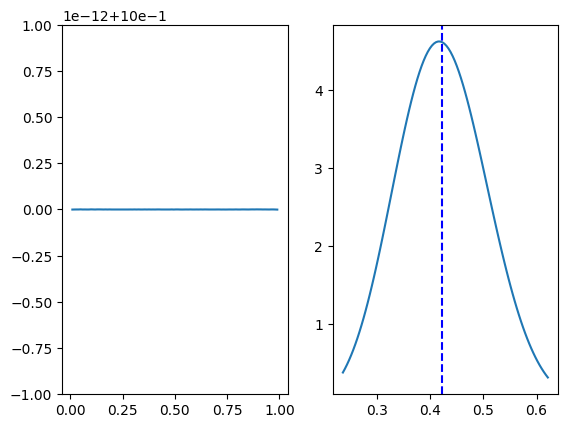

In [17]:
# GP Galaxies, assuming high probability of companion

a = 10
b = .2
nobs = len(gp)
companions = 4
shape_1 = a + companions
shape_2 = nobs + b - companions
post_mean = shape_1 / (shape_1 + shape_2)
post_var = (shape_1 * shape_2)/((shape_1+shape_2)**2*(shape_1+shape_2+1))
post_lb = beta.ppf(.025, shape_1, shape_2)
post_ub = beta.ppf(.975, shape_1, shape_2)
print('Mean for a=10, b=0.2:',round(post_mean,4))

print('Lower bound:',round(post_lb,4)," and Upper bound:",round(post_ub,4))

ix,ax = plt.subplots(1,2)
x1 = np.linspace(beta.ppf(0.01, 1, 1), beta.ppf(0.99, 1, 1), 100)
y = beta.pdf(x1,1,1)
ax[0].plot(x1,y)
xp = np.linspace(beta.ppf(0.01, shape_1, shape_2), beta.ppf(0.99, shape_1, shape_2), 100)
y = beta.pdf(xp, shape_1, shape_2)
ax[1].plot(xp,y)
ax[1].axvline(post_mean,color='b',ls='--')

Mean for a=2, b=4: 0.2069
Lower bound: 0.083  and Upper bound: 0.3689
Max at: 


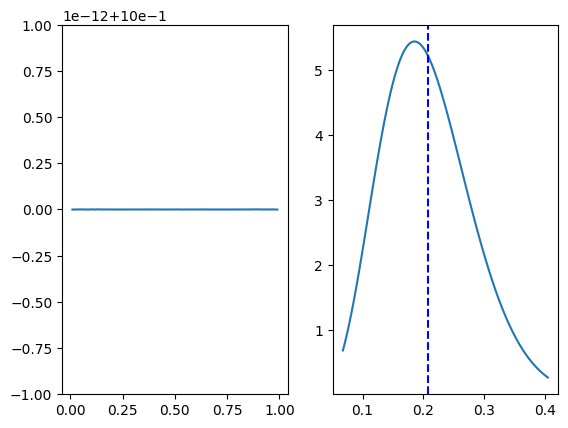

In [18]:
#Assuming low probability of companion

a = 2
b = 4
nobs = len(gp)
companions = 4
shape_1 = a + companions
shape_2 = nobs + b - companions
post_mean = shape_1 / (shape_1 + shape_2)
#post_var =
post_lb = beta.ppf(.025, shape_1, shape_2)
post_ub = beta.ppf(.975, shape_1, shape_2)
print('Mean for a=2, b=4:',round(post_mean,4))

print('Lower bound:',round(post_lb,4)," and Upper bound:",round(post_ub,4))

ix,ax = plt.subplots(1,2)
x1 = np.linspace(beta.ppf(0.01, 1, 1), beta.ppf(0.99, 1, 1), 100)
y = beta.pdf(x1,1,1)
ax[0].plot(x1,y)
xp = np.linspace(beta.ppf(0.01, shape_1, shape_2), beta.ppf(0.99, shape_1, shape_2), 100)
y = beta.pdf(xp, shape_1, shape_2)
ax[1].plot(xp,y)
ax[1].axvline(post_mean,color='b',ls='--')
print("Max at: ")

Conclusion: Low-ish sensitivity. Even if we assume for our prior that there is a high probability that a GP Galaxy has a companion (a=10,b=0.2), the posterior mean is still less than 50%, and the confidence intervals for both overlap. This is because our likelihood data only contained 4 observations out of 23 (17.4%), which pulls the posterior mean down.

Mean for a=10, b=0.02: 0.1886
Lower bound: 0.0962  and Upper bound: 0.3032
Maximum at: 


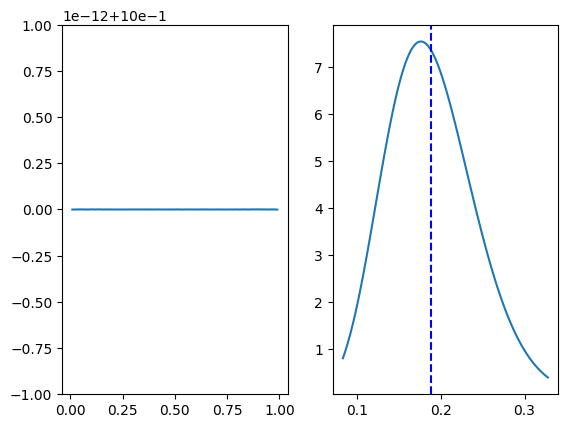

In [19]:
#Non Green Peas, assume high probability of companion

a = 10
b = 0.02
nobs = len(not_gp)
companions = 0 #zero observations with companion
shape_1 = a + companions
shape_2 = nobs + b - companions
post_mean = shape_1 / (shape_1 + shape_2)
post_lb = beta.ppf(.025, shape_1, shape_2)
post_ub = beta.ppf(.975, shape_1, shape_2)
print('Mean for a=10, b=0.02:',round(post_mean,4))

print('Lower bound:',round(post_lb,4)," and Upper bound:",round(post_ub,4))

ix,ax = plt.subplots(1,2)
x1 = np.linspace(beta.ppf(0.01, 1, 1), beta.ppf(0.99, 1, 1), 100)
y = beta.pdf(x1,1,1)
ax[0].plot(x1,y)
xp = np.linspace(beta.ppf(0.01, shape_1, shape_2), beta.ppf(0.99, shape_1, shape_2), 100)
y = beta.pdf(xp, shape_1, shape_2)
ax[1].plot(xp,y)
ax[1].axvline(post_mean,color='b',ls='--')
print("Maximum at: ", )

Conclusion: Conversely, for the Non-GP Galaxies, there is a higher sensitivity to hyperparameter shifts, because our data has zero observations of companions. Assuming that there is a high probability of a given galaxy having a companion (a=10, b=0.02), the mean is shifted up to about 0.2, even with zero successes in our data.

### 6. General Conclusions
I would not be comfortable assuming that green pea galaxies are more likely to have a companion than non-green pea galaxies, primarily because of the small sample size for our data. We only had four cases of companionship, all of which happened to be in the Green Pea galaxy sample, but this does not mean that all Green Peas have a higher frequency of companions. The second reason I would be wary of making this conclusion is because of the high sensitivity of the non-green pea galaxies to the hyperparameters a and b. It is quite easy to find confidence intervals that overlap between GP and Non-GP datasets simply by adjusting our a and b prior assumptions about the mean. Since there is this overlap, we cannot make any firm conclusions about the difference between companionship likelihood between the two data sets.